# 8.8 - AB Testing Bayesiano


### Conjugado a priori

https://en.wikipedia.org/wiki/Conjugate_prior

https://en.wikipedia.org/wiki/Beta_distribution

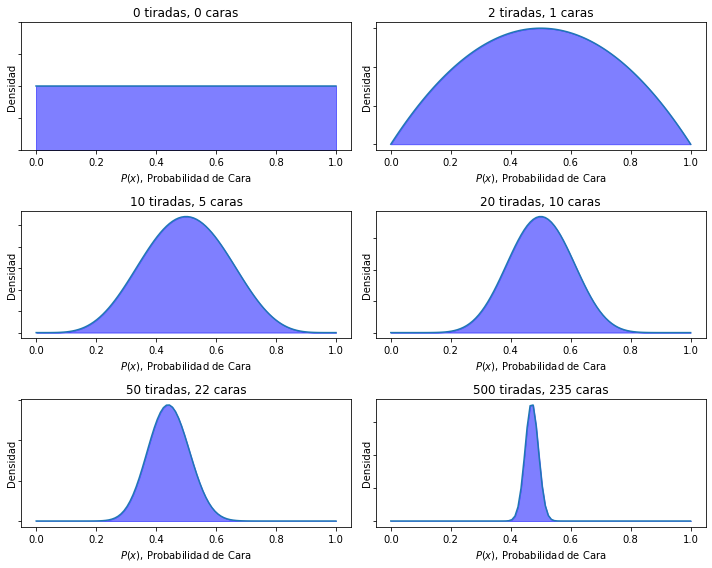

In [1]:
# tiros_de_moneda  (modelo beta-binomial)

import warnings
warnings.simplefilter('ignore')


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, beta  

plt.figure(figsize=(10, 8))


tiradas=[0,2,10,20,50,500]    # lista del numero de intentos (experimentos de Bernoulli)
  
datos=bernoulli.rvs(0.5,size=tiradas[-1])   # se tiran 500 veces la moneda, 0-cruz, 1-cara (B(p,n))

x=np.linspace(0,1,100)  # espaciado lineal entre 0 y 1, 100 puntos, se discretiza el eje x


for i,N in enumerate(tiradas):  # se actualiza la informacion respecto al nº de tiradas, modelo beta-binomial (i actualizaciones , N tiradas)

    caras=datos[:N].sum()                              # suma las caras que van saliendo
    ax=plt.subplot(len(tiradas)/2, 2, i+1)             # se crea un plot cada vez que se actualiza
    
    ax.set_title("%s tiradas, %s caras" % (N, caras))  # titulo  
    plt.xlabel("$P(x)$, Probabilidad de Cara")         # etiqueta x
    plt.ylabel("Densidad")                             # etiqueta y
    
    if i == 0:                                         # limite del eje y en el primer plot (0 tiradas)
        plt.ylim([0.0, 2.0])
    plt.setp(ax.get_yticklabels(), visible=False)      # quita los numeros del eje y
    
    y=beta.pdf(x, 1+caras, 1+N-caras)                  # se crea y se dibuja la distribucion beta que representa... (Beta(x,a,b))
    plt.plot(x,y)                                      # ... la creencia a posteriori de la perfeccion de la moneda (beta-binomial, bayesiano)
    plt.fill_between(x, 0, y, color='b', alpha=0.5)    # se rellena de color la distribucion 


plt.tight_layout()  # se expande el plot
plt.show();         # se plotea

In [2]:
from lib.bayes_func import *

In [3]:
# los datos son conocidos: impresiones, conversiones, control y test

imps_crtl, convs_ctrl = 16500, 30
imps_test, convs_test = 17000, 50

CR_ctrl=convs_ctrl/imps_crtl  # tasas de conversion
CR_test=convs_test/imps_test


'Tasas: ', CR_ctrl, CR_test

('Tasas: ', 0.0018181818181818182, 0.0029411764705882353)

In [5]:
# se crean las betas a prioris

a_C, b_C = convs_ctrl+1, imps_crtl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1


beta_C=beta(a_C, b_C)   # control 
beta_T=beta(a_T, b_T)   # test

In [8]:
salto=(beta_T.mean()-beta_C.mean())/beta_C.mean()

salto

0.5967798854783688

In [10]:
prob=calc_prob(beta_T, beta_C)

prob

0.9821319709029355

In [11]:
'El test aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'.format(salto*100, prob*100)

'El test aumenta la tasa de conversion en un 59.68%, con una probabilidad del 98.21%'

0.0018181818181818182 0.0029411764705882353


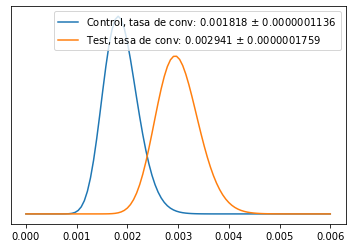

In [12]:
print (CR_ctrl, CR_test)
plot([beta_C, beta_T], ['Control', 'Test'])

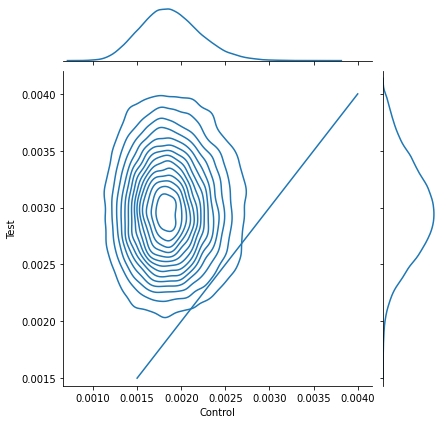

In [13]:
import seaborn as sns
import pandas as pd

val_C=np.random.beta(a_C, b_C, 50000)
val_T=np.random.beta(a_T, b_T, 50000)

vals=np.vstack([val_C, val_T]).T
limit=0.004

df=pd.DataFrame(vals, columns=['Control','Test'])
df=df[df.Control<limit]
df=df[df.Test<limit]


g=sns.jointplot(x=df.Control, y=df.Test, kind='kde', n_levels=15)
g.ax_joint.plot([0.0015, limit], [0.0015, limit])
plt.show();

### what if...? 

¿cual es la prob de que el test sea superior a 0.003 (CR)?

In [15]:
!pip install mpmath

     |████████████████████████████████| 532 kB 7.7 MB/s eta 0:00:01


In [16]:
from mpmath import betainc   # integral de beta

p=betainc(a_T, b_T, 0.003, 1, regularized=True)

p

mpf('0.48112566853812544')